In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('telecom_churn_dataset_100.csv')
df.head(10)

,customer_id,age,tenure,monthly_charges,total_charges,internet_service,contract_type,customer_support_calls,churn
0,C001,64,55,86.87,2624.18,No,2 Year,8,0
1,C002,44,62,110.80,4969.82,No,2 Year,2,1
2,C003,30,59,46.16,3563.92,Fiber,1 Year,9,0
3,C004,24,4,47.42,2314.31,No,1 Year,4,0
4,C005,30,33,65.05,1308.20,Fiber,1 Year,2,1
5,C006,41,26,110.13,2318.96,Fiber,1 Year,4,1
6,C007,38,42,63.07,2765.84,Fiber,Month-to-Month,0,0
7,C008,52,70,119.78,1052.46,Fiber,1 Year,9,0
8,C009,48,64,93.63,4636.97,Fiber,1 Year,2,1
9,C010,65,42,62.79,4505.25,Fiber,Month-to-Month,8,0


In [94]:
df['contract_type'].unique()

array(['2 Year', '1 Year', 'Month-to-Month'], dtype=object)

## Preprocessing

In [95]:

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop=None)

encoded_features = encoder.fit_transform(df[['internet_service', 'contract_type']])

feature_names = encoder.get_feature_names_out(['internet_service', 'contract_type'])

encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded.drop(['internet_service', 'contract_type'], axis=1, inplace=True)


In [96]:
df_encoded.head(10)

,customer_id,age,tenure,monthly_charges,total_charges,customer_support_calls,churn,internet_service_DSL,internet_service_Fiber,internet_service_No,contract_type_1 Year,contract_type_2 Year,contract_type_Month-to-Month
0,C001,64,55,86.87,2624.18,8,0,0.0,0.0,1.0,0.0,1.0,0.0
1,C002,44,62,110.80,4969.82,2,1,0.0,0.0,1.0,0.0,1.0,0.0
2,C003,30,59,46.16,3563.92,9,0,0.0,1.0,0.0,1.0,0.0,0.0
3,C004,24,4,47.42,2314.31,4,0,0.0,0.0,1.0,1.0,0.0,0.0
4,C005,30,33,65.05,1308.20,2,1,0.0,1.0,0.0,1.0,0.0,0.0
5,C006,41,26,110.13,2318.96,4,1,0.0,1.0,0.0,1.0,0.0,0.0
6,C007,38,42,63.07,2765.84,0,0,0.0,1.0,0.0,0.0,0.0,1.0
7,C008,52,70,119.78,1052.46,9,0,0.0,1.0,0.0,1.0,0.0,0.0
8,C009,48,64,93.63,4636.97,2,1,0.0,1.0,0.0,1.0,0.0,0.0
9,C010,65,42,62.79,4505.25,8,0,0.0,1.0,0.0,0.0,0.0,1.0


In [97]:
df_main = df_encoded.drop(['customer_id'], axis=1)

In [98]:
df_main.head(10)

,age,tenure,monthly_charges,total_charges,customer_support_calls,churn,internet_service_DSL,internet_service_Fiber,internet_service_No,contract_type_1 Year,contract_type_2 Year,contract_type_Month-to-Month
0,64,55,86.87,2624.18,8,0,0.0,0.0,1.0,0.0,1.0,0.0
1,44,62,110.80,4969.82,2,1,0.0,0.0,1.0,0.0,1.0,0.0
2,30,59,46.16,3563.92,9,0,0.0,1.0,0.0,1.0,0.0,0.0
3,24,4,47.42,2314.31,4,0,0.0,0.0,1.0,1.0,0.0,0.0
4,30,33,65.05,1308.20,2,1,0.0,1.0,0.0,1.0,0.0,0.0
5,41,26,110.13,2318.96,4,1,0.0,1.0,0.0,1.0,0.0,0.0
6,38,42,63.07,2765.84,0,0,0.0,1.0,0.0,0.0,0.0,1.0
7,52,70,119.78,1052.46,9,0,0.0,1.0,0.0,1.0,0.0,0.0
8,48,64,93.63,4636.97,2,1,0.0,1.0,0.0,1.0,0.0,0.0
9,65,42,62.79,4505.25,8,0,0.0,1.0,0.0,0.0,0.0,1.0


## EDA


### Customer Churn Distribution

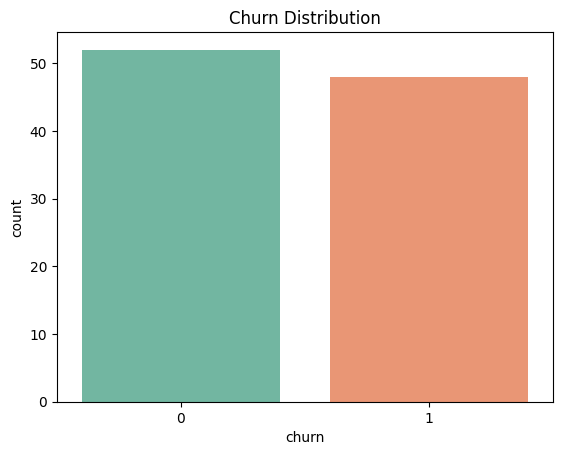

In [99]:
sns.countplot(x='churn', data=df_main, palette='Set2')
plt.title('Churn Distribution')
plt.show()

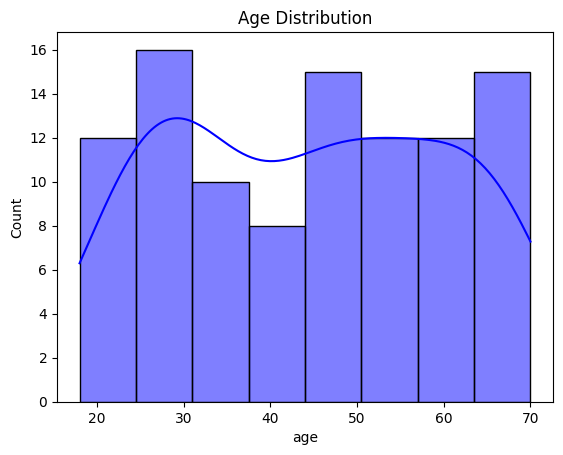

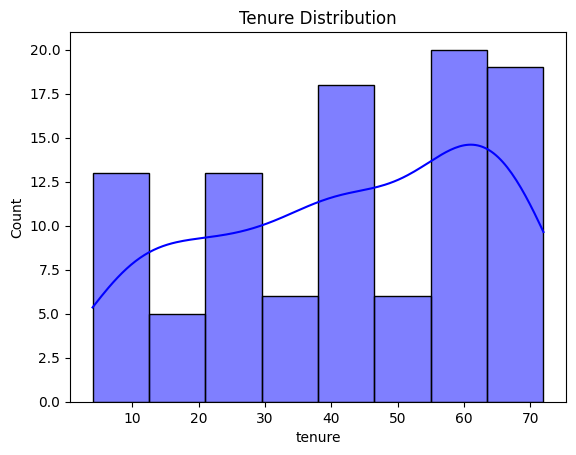

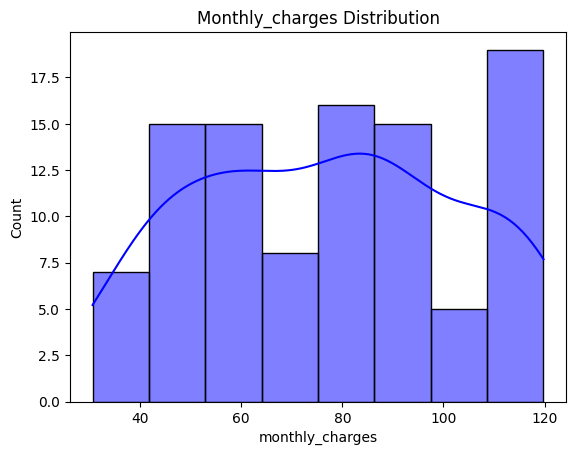

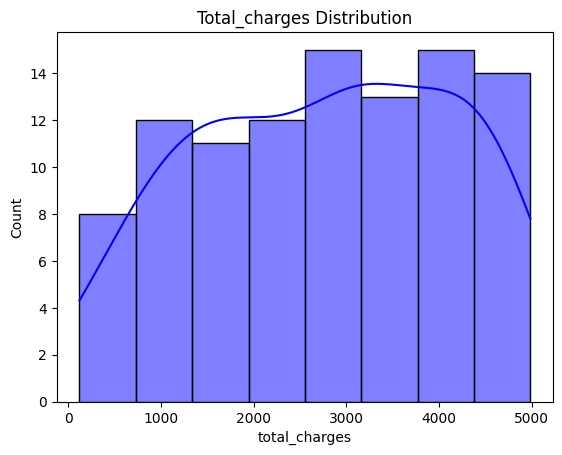

In [100]:
numerical_features = ['age', 'tenure', 'monthly_charges', 'total_charges']

for feature in numerical_features:
    sns.histplot(df_main[feature], kde=True, color='blue')
    plt.title(f'{feature.capitalize()} Distribution')
    plt.show()

### Coorelation Heatmap

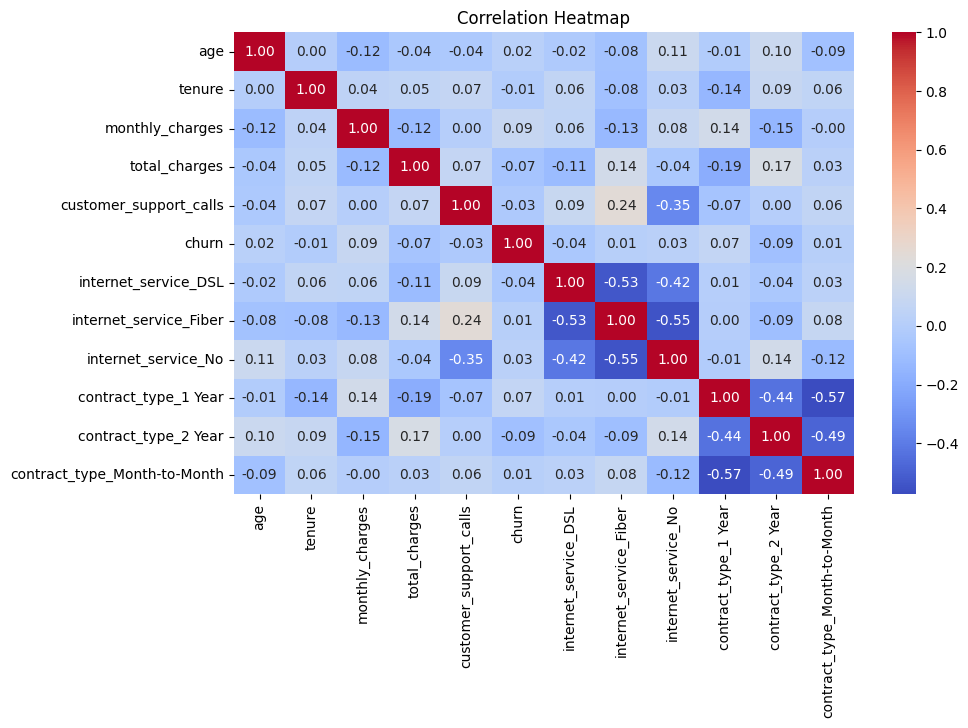

In [101]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_main.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

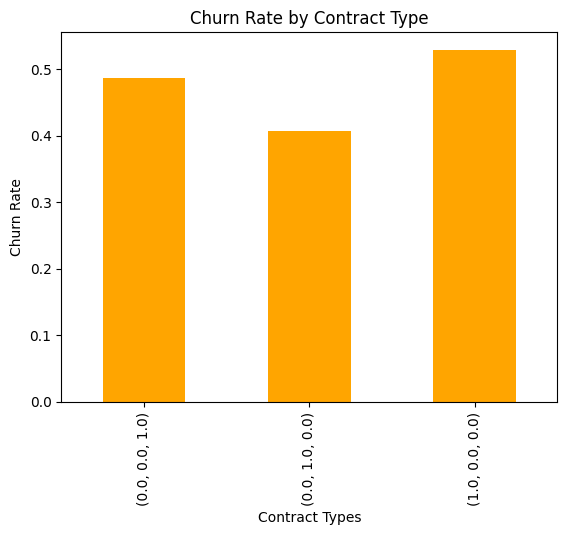

In [102]:
contract_features = ['contract_type_1 Year', 'contract_type_2 Year', 'contract_type_Month-to-Month']
contract_churn = df_main.groupby(contract_features)['churn'].mean()

contract_churn.plot(kind='bar', color='orange')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Types')
plt.show()

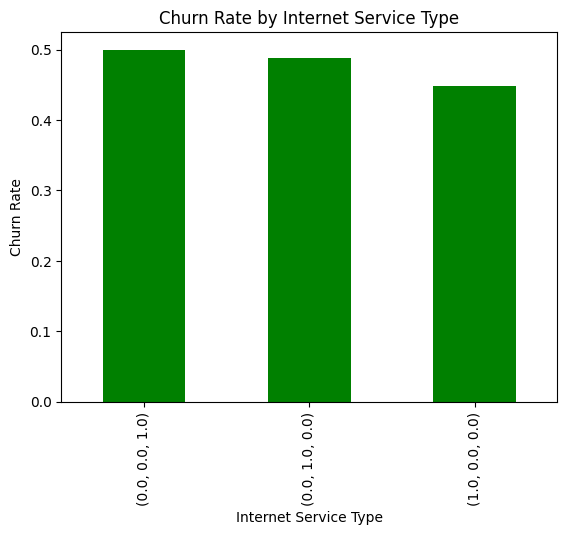

In [103]:
internet_service_features = ['internet_service_DSL', 'internet_service_Fiber', 'internet_service_No']
internet_churn = df_main.groupby(internet_service_features)['churn'].mean()

internet_churn.plot(kind='bar', color='green')
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service Type')
plt.show()

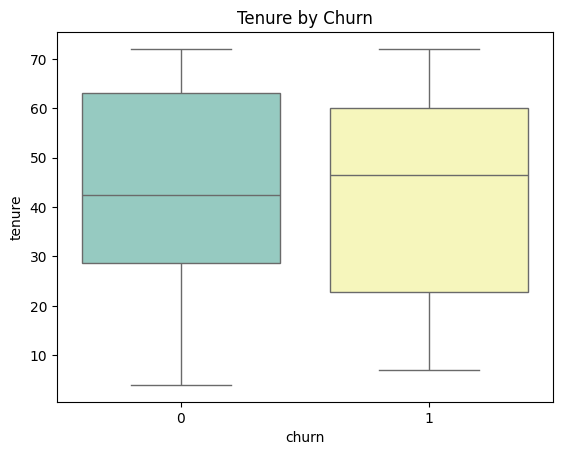

In [104]:
sns.boxplot(x='churn', y='tenure', data=df, palette='Set3')
plt.title('Tenure by Churn')
plt.show()

In [105]:
correlation_with_churn = df_main.corr()['churn'].sort_values(ascending=False)
print("Correlation with Churn:\n", correlation_with_churn)

Correlation with Churn:
 churn                           1.000000
monthly_charges                 0.085803
contract_type_1 Year            0.070986
internet_service_No             0.026207
age                             0.016423
internet_service_Fiber          0.013023
contract_type_Month-to-Month    0.011490
tenure                         -0.011833
customer_support_calls         -0.029273
internet_service_DSL           -0.040582
total_charges                  -0.068183
contract_type_2 Year           -0.088367
Name: churn, dtype: float64


From the correlation analysis, we deduce that **monthly_charges** has the strongest positive correlation with churn, indicating that customers with higher monthly charges are slightly more likely to churn. Contract types also play a role, with **1 Year contracts** showing a positive correlation, whereas **2 Year contracts** have a negative correlation, suggesting longer commitments reduce churn. Interestingly, **tenure** has a weak negative correlation, implying that customers with longer service durations are slightly less likely to churn. Additionally, **customer_support_calls** and **internet_service_DSL** show weak negative correlations, indicating minimal impact on churn. Overall, the correlations are relatively weak, suggesting that churn may depend on a combination of multiple factors rather than individual variables.

## Build and Evaluate Models

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier

In [107]:
X = df_main.drop(columns=['churn'])  
y = df_main['churn'] 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Logistic Regression

In [108]:
log_reg = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.1, 1, 10]}
grid_log = GridSearchCV(log_reg, param_grid, scoring='roc_auc', cv=5)
grid_log.fit(X_train, y_train)

# Predict and evaluate
log_preds = grid_log.best_estimator_.predict(X_test)
log_proba = grid_log.best_estimator_.predict_proba(X_test)[:, 1]

print("Logistic Regression Report:\n", classification_report(y_test, log_preds))
print("ROC-AUC:", roc_auc_score(y_test, log_proba))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.44      0.40      0.42        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20

ROC-AUC: 0.41000000000000003


### Random Forest

In [109]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='roc_auc', cv=5)
grid_rf.fit(X_train, y_train)

# Predict and evaluate
rf_preds = grid_rf.best_estimator_.predict(X_test)
rf_proba = grid_rf.best_estimator_.predict_proba(X_test)[:, 1]

print("Random Forest Report:\n", classification_report(y_test, rf_preds))
print("ROC-AUC:", roc_auc_score(y_test, rf_proba))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.33      0.30      0.32        10
           1       0.36      0.40      0.38        10

    accuracy                           0.35        20
   macro avg       0.35      0.35      0.35        20
weighted avg       0.35      0.35      0.35        20

ROC-AUC: 0.42


### XGBoost

In [110]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='roc_auc', cv=5)
grid_xgb.fit(X_train, y_train)

# Predict and evaluate
xgb_preds = grid_xgb.best_estimator_.predict(X_test)
xgb_proba = grid_xgb.best_estimator_.predict_proba(X_test)[:, 1]

print("XGBoost Report:\n", classification_report(y_test, xgb_preds))
print("ROC-AUC:", roc_auc_score(y_test, xgb_proba))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.43      0.30      0.35        10
           1       0.46      0.60      0.52        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.44        20
weighted avg       0.45      0.45      0.44        20

ROC-AUC: 0.57


In [113]:
base_learners = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42))
]


meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

stacking_model.fit(X_train, y_train)

stacking_preds = stacking_model.predict(X_test)
stacking_proba = stacking_model.predict_proba(X_test)[:, 1]


print("Stacking Model Report:\n", classification_report(y_test, stacking_preds))
print("ROC-AUC:", roc_auc_score(y_test, stacking_proba))


Stacking Model Report:
               precision    recall  f1-score   support

           0       0.56      0.90      0.69        10
           1       0.75      0.30      0.43        10

    accuracy                           0.60        20
   macro avg       0.66      0.60      0.56        20
weighted avg       0.66      0.60      0.56        20

ROC-AUC: 0.53


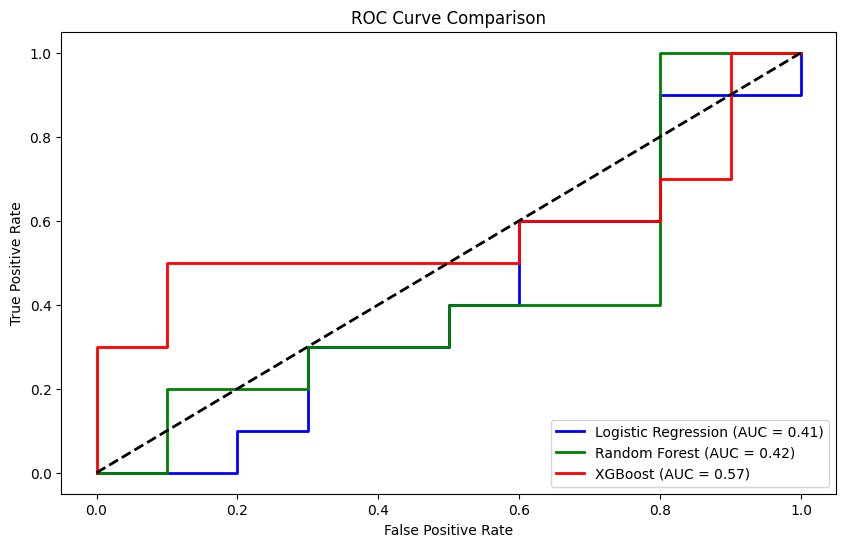

In [114]:
# Get the predicted probabilities for each model
log_reg_proba = grid_log.best_estimator_.predict_proba(X_test)[:, 1]
rf_proba = grid_rf.best_estimator_.predict_proba(X_test)[:, 1]
xgb_proba = grid_xgb.best_estimator_.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC for each model
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve comparison
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

### Key Predictors of Churn and Strategies to Reduce It:

1. **Monthly Charges**:
   - **Impact**: Higher charges increase churn.
   - **Strategy**: Offer discounts or flexible pricing to high-paying customers to improve perceived value.

2. **Contract Type (Month-to-Month)**:
   - **Impact**: Month-to-month contracts lead to higher churn.
   - **Strategy**: Encourage longer-term contracts with incentives like discounts or loyalty perks.

3. **Tenure**:
   - **Impact**: Shorter tenure correlates with higher churn.
   - **Strategy**: Enhance the early customer experience with personalized onboarding and early engagement.

4. **Customer Support Calls**:
   - **Impact**: More support calls suggest dissatisfaction and higher churn.
   - **Strategy**: Improve support services and offer proactive assistance to reduce dependency on customer support.

5. **Internet Service Type (Fiber)**:
   - **Impact**: Fiber users may churn due to high expectations.
   - **Strategy**: Ensure reliable service quality for fiber customers and offer additional benefits to enhance value.

### Overall Strategies:
- Improve customer onboarding and engagement.
- Provide flexible pricing and long-term contract incentives.
- Offer proactive and personalized customer support.
- Regularly monitor service quality, especially for high-demand services like fiber.


### Feature Selection

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

selector = SelectFromModel(rf, threshold="mean", max_features=5, importance_getter="auto")
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'tenure', 'monthly_charges', 'total_charges',
       'customer_support_calls'],
      dtype='object')


In [74]:
# Re-run the models with selected features
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_selected, y_train)
log_reg_preds = log_reg.predict(X_test_selected)
log_reg_proba = log_reg.predict_proba(X_test_selected)[:, 1]

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train)
rf_preds = rf.predict(X_test_selected)
rf_proba = rf.predict_proba(X_test_selected)[:, 1]

# XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_selected, y_train)
xgb_preds = xgb.predict(X_test_selected)
xgb_proba = xgb.predict_proba(X_test_selected)[:, 1]


In [75]:
# Evaluate Logistic Regression
print("Logistic Regression Report:\n", classification_report(y_test, log_reg_preds))
print("ROC-AUC:", roc_auc_score(y_test, log_reg_proba))

# Evaluate Random Forest
print("Random Forest Report:\n", classification_report(y_test, rf_preds))
print("ROC-AUC:", roc_auc_score(y_test, rf_proba))

# Evaluate XGBoost
print("XGBoost Report:\n", classification_report(y_test, xgb_preds))
print("ROC-AUC:", roc_auc_score(y_test, xgb_proba))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.56      0.50      0.53        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20

ROC-AUC: 0.51
Random Forest Report:
               precision    recall  f1-score   support

           0       0.36      0.40      0.38        10
           1       0.33      0.30      0.32        10

    accuracy                           0.35        20
   macro avg       0.35      0.35      0.35        20
weighted avg       0.35      0.35      0.35        20

ROC-AUC: 0.405
XGBoost Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.50      0.50      0.50        10

    accuracy                           0.50        20
   macro avg       0.50      0

After performing feature selection, the results for the three models are as follows:

- **Logistic Regression**: The model shows a balanced performance with an accuracy of 55%. The precision and recall for class 0 are 0.55 and 0.60, respectively, while for class 1, they are 0.56 and 0.50. The **ROC-AUC** is 0.51, indicating a slight improvement over random guessing, but still, there's room for better performance.

- **Random Forest**: This model has lower precision and recall compared to Logistic Regression, with an accuracy of just 35%. Precision and recall for class 0 are 0.36 and 0.40, and for class 1, they are 0.33 and 0.30. The **ROC-AUC** is 0.405, suggesting the model struggles to differentiate between the classes effectively.

- **XGBoost**: XGBoost performs moderately well with a balanced precision and recall of 0.50 for both classes, resulting in an accuracy of 50%. The **ROC-AUC** score is 0.53, showing a slight improvement over the other models, but still underperforming in terms of distinguishing churn from non-churn effectively.

### Conclusion:
While Logistic Regression shows the most balanced performance with the highest accuracy and ROC-AUC, all models exhibit limited success in distinguishing churn and non-churn customers. The **ROC-AUC scores** suggest that the models are only marginally better than random guessing, indicating that additional feature engineering, data preprocessing, or the introduction of more complex models may be required to improve prediction accuracy.

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_selected, y_train)
nb_preds = nb.predict(X_test_selected)
nb_proba = nb.predict_proba(X_test_selected)[:, 1]

# Train Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_selected, y_train)
svm_preds = svm.predict(X_test_selected)
svm_proba = svm.predict_proba(X_test_selected)[:, 1]

print("Naive Bayes Report:\n", classification_report(y_test, nb_preds))
print("ROC-AUC:", roc_auc_score(y_test, nb_proba))

print("SVM Report:\n", classification_report(y_test, svm_preds))
print("ROC-AUC:", roc_auc_score(y_test, svm_proba))


Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.45      0.50      0.48        10
           1       0.44      0.40      0.42        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20

ROC-AUC: 0.48
SVM Report:
               precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.50      0.40      0.44        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.50      0.50      0.49        20

ROC-AUC: 0.53


After applying **Naive Bayes** and **SVM**, here are the results:

- **Naive Bayes** achieved an accuracy of 45% with a **ROC-AUC** of 0.48, indicating a modest performance. The precision and recall for class 0 are 0.45 and 0.50, respectively, while for class 1, they are 0.44 and 0.40. This suggests that while the model performs similarly for both classes, it struggles to effectively differentiate between churn and non-churn customers.

- **Support Vector Machine (SVM)** achieved an accuracy of 50% with a slightly better **ROC-AUC** of 0.53. The precision and recall for class 0 are 0.50 and 0.60, while for class 1, they are 0.50 and 0.40. Although it performs slightly better for class 0 compared to Naive Bayes, it still shows limited success in distinguishing between the two classes, especially for class 1.


## Feature Engineering 

In [80]:
df_new = df_main.copy()
df_new['charges_per_month'] = df_main['monthly_charges'] / (df['tenure'] + 1)

df_new['age_group'] = pd.cut(df_main['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-Aged', 'Old'])


df_new['charges_group'] = pd.cut(df_main['monthly_charges'], bins=[0, 50, 100, 200, 300], labels=['Low', 'Medium', 'High', 'Very High'])


df_new = pd.get_dummies(df_new, columns=['age_group', 'charges_group'], drop_first=True)

# Inspect the new features
df_new.head()

,age,tenure,monthly_charges,total_charges,customer_support_calls,churn,internet_service_DSL,internet_service_Fiber,internet_service_No,contract_type_1 Year,contract_type_2 Year,contract_type_Month-to-Month,charges_per_month,age_group_Middle-Aged,age_group_Old,charges_group_Medium,charges_group_High,charges_group_Very High
0,64,55,86.87,2624.18,8,0,0.0,0.0,1.0,0.0,1.0,0.0,1.551250,False,True,True,False,False
1,44,62,110.80,4969.82,2,1,0.0,0.0,1.0,0.0,1.0,0.0,1.758730,True,False,False,True,False
2,30,59,46.16,3563.92,9,0,0.0,1.0,0.0,1.0,0.0,0.0,0.769333,False,False,False,False,False
3,24,4,47.42,2314.31,4,0,0.0,0.0,1.0,1.0,0.0,0.0,9.484000,False,False,False,False,False
4,30,33,65.05,1308.20,2,1,0.0,1.0,0.0,1.0,0.0,0.0,1.913235,False,False,True,False,False


In [81]:
df_new = df_new.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

df_new.head()

,age,tenure,monthly_charges,total_charges,customer_support_calls,churn,internet_service_DSL,internet_service_Fiber,internet_service_No,contract_type_1 Year,contract_type_2 Year,contract_type_Month-to-Month,charges_per_month,age_group_Middle-Aged,age_group_Old,charges_group_Medium,charges_group_High,charges_group_Very High
0,64,55,86.87,2624.18,8,0,0.0,0.0,1.0,0.0,1.0,0.0,1.551250,0,1,1,0,0
1,44,62,110.80,4969.82,2,1,0.0,0.0,1.0,0.0,1.0,0.0,1.758730,1,0,0,1,0
2,30,59,46.16,3563.92,9,0,0.0,1.0,0.0,1.0,0.0,0.0,0.769333,0,0,0,0,0
3,24,4,47.42,2314.31,4,0,0.0,0.0,1.0,1.0,0.0,0.0,9.484000,0,0,0,0,0
4,30,33,65.05,1308.20,2,1,0.0,1.0,0.0,1.0,0.0,0.0,1.913235,0,0,1,0,0


In [90]:

# Separate features and target
X = df_new.drop(columns=['churn'])  # Drop non-feature columns
y = df_new['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='roc_auc', cv=5)
grid_xgb.fit(X_train, y_train)

# Predict and evaluate
xgb_preds = grid_xgb.best_estimator_.predict(X_test)
xgb_proba = grid_xgb.best_estimator_.predict_proba(X_test)[:, 1]

print("XGBoost Report:\n", classification_report(y_test, xgb_preds))
print("ROC-AUC:", roc_auc_score(y_test, xgb_proba))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.25      0.50      0.33         6
           1       0.62      0.36      0.45        14

    accuracy                           0.40        20
   macro avg       0.44      0.43      0.39        20
weighted avg       0.51      0.40      0.42        20

ROC-AUC: 0.29761904761904756


In [88]:
base_learners = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42))
]


meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

stacking_model.fit(X_train_resampled, y_train_resampled)

stacking_preds = stacking_model.predict(X_test)
stacking_proba = stacking_model.predict_proba(X_test)[:, 1]


print("Stacking Model Report:\n", classification_report(y_test, stacking_preds))
print("ROC-AUC:", roc_auc_score(y_test, stacking_proba))


Stacking Model Report:
               precision    recall  f1-score   support

           0       0.29      0.67      0.40         6
           1       0.67      0.29      0.40        14

    accuracy                           0.40        20
   macro avg       0.48      0.48      0.40        20
weighted avg       0.55      0.40      0.40        20

ROC-AUC: 0.4047619047619048
